In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 2.0 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
import pandas as pd
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
import sklearn

In [ ]:
# 데이터셋
df = pd.read_excel('/content/산일구비_최종_데이터셋.xlsx')
df1 = df.iloc[:, [16,17,19,22]]
df1

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.013375,0.184655,1.626016,13.008130
1,0.014834,0.227207,1.342282,2.684564
2,0.015225,0.181994,0.440529,2.202643
3,0.007472,0.186518,0.000000,0.450958
4,0.018599,0.167987,0.000000,5.555556
...,...,...,...,...
419,0.018645,0.171841,0.000000,1.960784
420,0.015220,0.174306,0.636943,8.280255
421,0.041175,0.170891,0.460829,3.225806
422,0.060275,0.158318,0.357143,1.785714


In [ ]:
# 최적 클러스터 개수 결정
# 1) 엘보우 기법
def elbow(X) :
    wcss = []
    for i in range(1,11):
        model = KMedoids(n_clusters = i, init = "k-medoids++", random_state = 0)
        model.fit(X)
        wcss.append(model.inertia_)
    plt.figure(figsize=(10,10))
    plt.plot(range(1,11), wcss, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [ ]:
# # 2) 실루엣 기법
# import numpy as np
# from sklearn.metrics import silhouette_samples
# from matplotlib import cm

# def plotSilhouette(x, pred):
#     cluster_labels = np.unique(pred)
#     n_clusters = cluster_labels.shape[0]   # 클러스터 개수를 n_clusters에 저장
#     sil_val = silhouette_samples(x, pred, metric='euclidean')  # 실루엣 계수를 계산
#     y_ax_lower, y_ax_upper = 0, 0
#     yticks = []
#     for i, c in enumerate(cluster_labels):
#         # 각 클러스터에 속하는 데이터들에 대한 실루엣 값을 수평 막대 그래프로 그려주기
#         c_sil_value = sil_val[pred == c]
#         c_sil_value.sort()
#         y_ax_upper += len(c_sil_value)
#         color = cm.jet(i/n_clusters)

#         plt.barh(range(y_ax_lower, y_ax_upper), c_sil_value, height=1.0,
#                  edgecolor='none', color=color)
#         yticks.append((y_ax_lower + y_ax_upper) / 2)
#         y_ax_lower += len(c_sil_value)

#     sil_avg = np.mean(sil_val)         # 평균 저장
#     plt.axvline(sil_avg, color='red', linestyle='--')  # 계산된 실루엣 계수의 평균값을 빨간 점선으로 표시
#     plt.yticks(yticks, cluster_labels + 1)
#     plt.ylabel('클러스터')
#     plt.xlabel('실루엣 계수')
#     plt.show() 

## MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1)
scaled

array([[0.00685955, 0.4618756 , 0.37398374, 0.23848238],
       [0.00762051, 0.64730718, 0.30872483, 0.049217  ],
       [0.00782487, 0.4502762 , 0.10132159, 0.04038179],
       ...,
       [0.02136152, 0.40189206, 0.10599078, 0.05913978],
       [0.03132487, 0.34710337, 0.08214286, 0.0327381 ],
       [0.01537441, 0.16944486, 0.17358491, 0.02075472]])

In [ ]:
df = pd.DataFrame(scaled)
df.columns = df1.columns
df.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.006860,0.461876,0.373984,0.238482
1,0.007621,0.647307,0.308725,0.049217
2,0.007825,0.450276,0.101322,0.040382
3,0.003780,0.469994,0.000000,0.008268
4,0.009584,0.389237,0.000000,0.101852


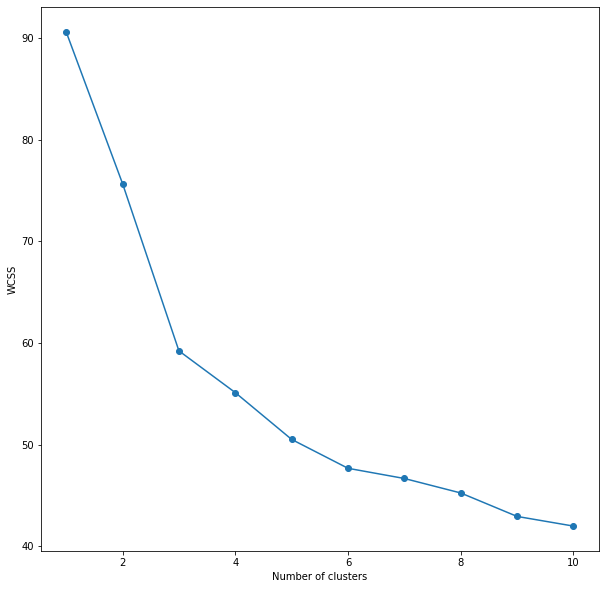

In [ ]:
elbow(df)

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score
k_range=range(2,15)
best_n=-1
best_silhouette_score = -1
silhouette_score_arr = []
for k in k_range:
    kmedoids=KMedoids(n_clusters=k, random_state=200)
    kmedoids.fit(df)
    clusters=kmedoids.predict(df)
    score=silhouette_score(df,clusters)
    print('k:',k,'score: ',score)
    silhouette_score_arr.append(score)

    if score> best_silhouette_score:
        best_n=k
        best_silhouette_score=score
        
print('best_n:',best_n,'best score:',best_silhouette_score)
silhouette_score_arr=np.array(silhouette_score_arr)

k: 2 score:  0.3910546933237339
k: 3 score:  0.31852968683978694
k: 4 score:  0.21708811831159053
k: 5 score:  0.23139069765535758
k: 6 score:  0.2524946290704237
k: 7 score:  0.21147576190657574
k: 8 score:  0.2021517155788036
k: 9 score:  0.2099763023403876
k: 10 score:  0.21981553163037618
k: 11 score:  0.21517411703734207
k: 12 score:  0.194127150790117
k: 13 score:  0.19559207837332399
k: 14 score:  0.20684948050568652
best_n: 2 best score: 0.3910546933237339


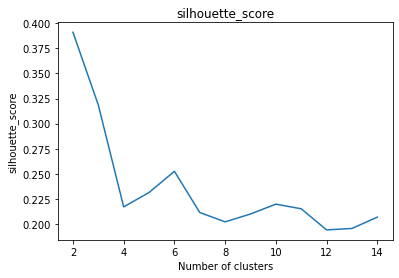

In [ ]:
plt.plot(k_range,silhouette_score_arr)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [ ]:
pca = PCA(2)
data = pca.fit_transform(df)

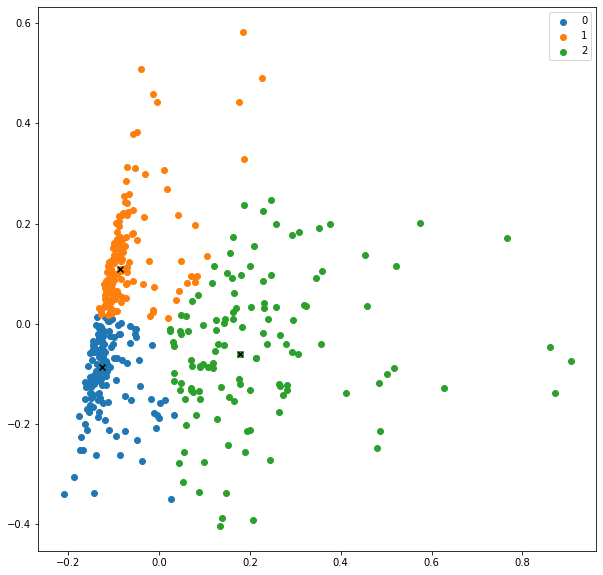

In [ ]:
cobj = KMedoids(n_clusters=3).fit(data)
label = cobj.labels_
centers = np.array(cobj.cluster_centers_)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
cobj.inertia_

47.64739968095257

In [ ]:
cluster = pd.Series(label)
df1['cluster'] = cluster
df1['cluster'].value_counts()

1    154
0    145
2    125
Name: cluster, dtype: int64

In [ ]:
import pandas as pd

df_l = pd.DataFrame(columns = df1.columns[:-1])
df_l

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율


In [ ]:
c1=[]
c2=[]
c3=[]
c4=[]

for i in range(3):    
    c1.append(df1[df1['cluster']==i]['기초생활수급자 인원_비율'].mean())
    c2.append(df1[df1['cluster']==i]['65세 이상 인구 수_비율'].mean())
    c3.append(df1[df1['cluster']==i]['우체국 수_비율'].mean())
    c4.append(df1[df1['cluster']==i]['ATM 수_비율'].mean())

df_l['기초생활수급자 인원_비율']=c1
df_l['65세 이상 인구 수_비율']=c2
df_l['우체국 수_비율']=c3
df_l['ATM 수_비율']=c4

In [ ]:
df_l

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.025579,0.139080,0.092468,5.114044
1,0.062387,0.193703,0.096992,4.186328
2,0.038278,0.166367,1.430517,8.583390


In [ ]:
data = pd.read_excel('산일구비_최종_데이터셋.xlsx')

df1['자치구/동'] = data['자치구/동']
df1.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율,cluster,자치구/동
0,0.013375,0.184655,1.626016,13.008130,2,종로구 사직동
1,0.014834,0.227207,1.342282,2.684564,2,종로구 삼청동
2,0.015225,0.181994,0.440529,2.202643,1,종로구 부암동
3,0.007472,0.186518,0.000000,0.450958,1,종로구 평창동
4,0.018599,0.167987,0.000000,5.555556,1,종로구 무악동


In [ ]:
dong0 = []
dong1 = []
dong2 = []

data = pd.read_excel('산일구비_최종_데이터셋.xlsx')
for i in range(len(df1)):
    if df1.iloc[i]['cluster']==0:
        dong0.append(df1.iloc[i]['자치구/동'])
    elif df1.iloc[i]['cluster']==1:
        dong1.append(df1.iloc[i]['자치구/동'])
    else:
        dong2.append(df1.iloc[i]['자치구/동'])

In [ ]:
dong0

['종로구 교남동',
 '종로구 숭인2동',
 '중구 황학동',
 '용산구 효창동',
 '용산구 이촌1동',
 '용산구 서빙고동',
 '용산구 한남동',
 '성동구 왕십리2동',
 '성동구 행당2동',
 '성동구 응봉동',
 '성동구 금호4가동',
 '성동구 성수1가1동',
 '성동구 성수1가2동',
 '성동구 옥수동',
 '광진구 화양동',
 '광진구 군자동',
 '광진구 중곡1동',
 '광진구 능동',
 '광진구 구의2동',
 '광진구 광장동',
 '광진구 자양1동',
 '광진구 자양3동',
 '동대문구 회기동',
 '동대문구 휘경1동',
 '동대문구 휘경2동',
 '동대문구 장안2동',
 '동대문구 답십리1동',
 '중랑구 상봉2동',
 '성북구 돈암2동',
 '성북구 안암동',
 '성북구 보문동',
 '성북구 길음1동',
 '성북구 길음2동',
 '성북구 장위3동',
 '성북구 동선동',
 '강북구 삼각산동',
 '도봉구 쌍문4동',
 '도봉구 창4동',
 '노원구 공릉2동',
 '노원구 하계2동',
 '노원구 중계1동',
 '노원구 상계2동',
 '노원구 상계8동',
 '은평구 응암2동',
 '은평구 진관동',
 '서대문구 남가좌1동',
 '서대문구 남가좌2동',
 '서대문구 북가좌1동',
 '서대문구 북아현동',
 '서대문구 연희동',
 '마포구 용강동',
 '마포구 대흥동',
 '마포구 염리동',
 '마포구 신수동',
 '마포구 서교동',
 '마포구 합정동',
 '마포구 망원1동',
 '마포구 연남동',
 '마포구 성산2동',
 '마포구 상암동',
 '마포구 서강동',
 '양천구 목1동',
 '양천구 목2동',
 '양천구 목4동',
 '양천구 신월5동',
 '양천구 신월6동',
 '양천구 신정2동',
 '양천구 신정3동',
 '양천구 신정6동',
 '양천구 목5동',
 '강서구 염창동',
 '강서구 등촌1동',
 '강서구 등촌2동',
 '강서구 화곡2동',
 '강서구 화곡6동',
 '강서구 가양1동',
 '강서구 발산1동',
 '강서구 공항동',


In [ ]:
dong1

['종로구 가회동',
 '종로구 창신1동',
 '중구 청구동',
 '용산구 남영동',
 '용산구 이촌2동',
 '동대문구 청량리동',
 '동대문구 제기동',
 '중랑구 면목4동',
 '중랑구 중화2동',
 '중랑구 망우3동',
 '성북구 정릉3동',
 '성북구 석관동',
 '강북구 번2동',
 '강북구 번3동',
 '강북구 수유1동',
 '강북구 미아동',
 '강북구 우이동',
 '강북구 인수동',
 '도봉구 쌍문1동',
 '도봉구 방학2동',
 '도봉구 창3동',
 '도봉구 도봉1동',
 '노원구 월계2동',
 '노원구 중계4동',
 '노원구 상계5동',
 '노원구 상계3.4동',
 '은평구 불광1동',
 '은평구 갈현1동',
 '은평구 증산동',
 '은평구 불광2동',
 '서대문구 홍제3동',
 '서대문구 홍제2동',
 '서대문구 홍은1동',
 '양천구 신월1동',
 '양천구 신월7동',
 '강서구 가양2동',
 '강서구 가양3동',
 '강서구 방화2동',
 '강서구 방화3동',
 '구로구 개봉2동',
 '구로구 개봉3동',
 '금천구 시흥3동',
 '금천구 시흥4동',
 '금천구 시흥5동',
 '동작구 노량진2동',
 '관악구 난곡동',
 '관악구 삼성동',
 '강남구 개포1동',
 '강남구 수서동',
 '송파구 마천2동',
 '송파구 잠실7동',
 '강동구 둔촌1동']

In [ ]:
dong2

['종로구 사직동',
 '종로구 삼청동',
 '종로구 부암동',
 '종로구 평창동',
 '종로구 무악동',
 '종로구 종로1.2.3.4가동',
 '종로구 종로5.6가동',
 '종로구 이화동',
 '종로구 창신2동',
 '종로구 창신3동',
 '종로구 숭인1동',
 '종로구 숭인2동',
 '종로구 청운효자동',
 '종로구 혜화동',
 '중구 소공동',
 '중구 회현동',
 '중구 명동',
 '중구 필동',
 '중구 장충동',
 '중구 광희동',
 '중구 을지로동',
 '중구 신당5동',
 '중구 중림동',
 '중구 신당동',
 '중구 다산동',
 '중구 약수동',
 '중구 동화동',
 '용산구 후암동',
 '용산구 용산2가동',
 '용산구 원효로2동',
 '용산구 용문동',
 '용산구 이촌1동',
 '용산구 이태원1동',
 '용산구 이태원2동',
 '용산구 보광동',
 '용산구 청파동',
 '용산구 원효로1동',
 '용산구 한강로동',
 '용산구 한남동',
 '성동구 마장동',
 '성동구 사근동',
 '성동구 행당1동',
 '성동구 응봉동',
 '성동구 금호1가동',
 '성동구 금호4가동',
 '성동구 성수2가1동',
 '성동구 성수2가3동',
 '성동구 송정동',
 '성동구 용답동',
 '성동구 왕십리도선동',
 '성동구 금호2.3가동',
 '광진구 화양동',
 '광진구 중곡2동',
 '광진구 중곡3동',
 '광진구 중곡4동',
 '광진구 구의1동',
 '광진구 구의2동',
 '광진구 구의3동',
 '광진구 자양2동',
 '광진구 자양4동',
 '동대문구 용신동',
 '동대문구 전농1동',
 '동대문구 전농2동',
 '동대문구 답십리2동',
 '동대문구 장안1동',
 '동대문구 이문1동',
 '동대문구 이문2동',
 '중랑구 면목2동',
 '중랑구 면목5동',
 '중랑구 면목7동',
 '중랑구 상봉1동',
 '중랑구 중화1동',
 '중랑구 묵1동',
 '중랑구 묵2동',
 '중랑구 신내1동',
 '중랑구 신내2동',
 '중랑구 면목본동',
 '중랑구 면목3.8

## StandardScaler

In [ ]:
# 데이터셋
df = pd.read_excel('/content/산일구비_최종_데이터셋.xlsx')
df1 = df.iloc[:, [16,17,19,22]]
df1

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.013375,0.184655,1.626016,13.008130
1,0.014834,0.227207,1.342282,2.684564
2,0.015225,0.181994,0.440529,2.202643
3,0.007472,0.186518,0.000000,0.450958
4,0.018599,0.167987,0.000000,5.555556
...,...,...,...,...
419,0.018645,0.171841,0.000000,1.960784
420,0.015220,0.174306,0.636943,8.280255
421,0.041175,0.170891,0.460829,3.225806
422,0.060275,0.158318,0.357143,1.785714


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
scaled = scaler.fit_transform(df1)

In [ ]:
df2 = pd.DataFrame(scaled)
df2.columns = df1.columns
df2.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,-0.307798,0.512875,1.525827,1.344888
1,-0.292482,1.746470,1.145207,-0.581247
2,-0.288369,0.435709,-0.064463,-0.671162
3,-0.369775,0.566886,-0.655417,-0.997986
4,-0.252954,0.029641,-0.655417,-0.045588


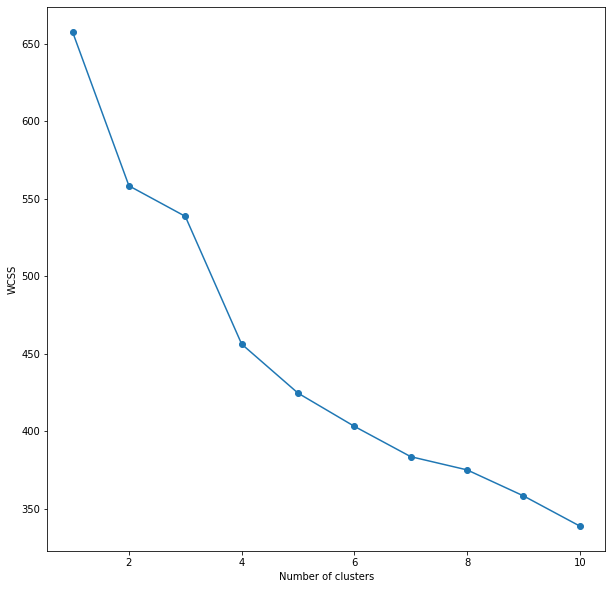

In [ ]:
elbow(df2)

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score
k_range=range(2,15)
best_n=-1
best_silhouette_score = -1
silhouette_score_arr = []
for k in k_range:
    kmedoids=KMedoids(n_clusters=k, random_state=200)
    kmedoids.fit(df2)
    clusters=kmedoids.predict(df2)
    score=silhouette_score(df2,clusters)
    print('k:',k,'score: ',score)
    silhouette_score_arr.append(score)

    if score> best_silhouette_score:
        best_n=k
        best_silhouette_score=score
        
print('best_n:',best_n,'best score:',best_silhouette_score)
silhouette_score_arr=np.array(silhouette_score_arr)

k: 2 score:  0.292370279557006
k: 3 score:  0.2510213729091946
k: 4 score:  0.22612472954313198
k: 5 score:  0.1657183982102318
k: 6 score:  0.19563812078144063
k: 7 score:  0.1719976576713274
k: 8 score:  0.1351361397846855
k: 9 score:  0.14788079049872255
k: 10 score:  0.1462810204594974
k: 11 score:  0.1655743907350007
k: 12 score:  0.09944827742406538
k: 13 score:  0.13746030870460066
k: 14 score:  0.13364143609781204
best_n: 2 best score: 0.292370279557006


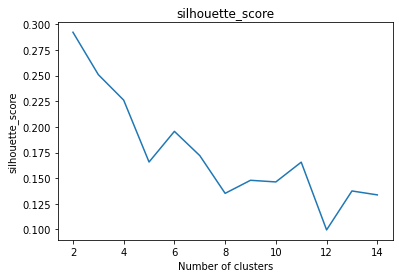

In [ ]:
plt.plot(k_range,silhouette_score_arr)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [ ]:
pca = PCA(2)
data = pca.fit_transform(df2)

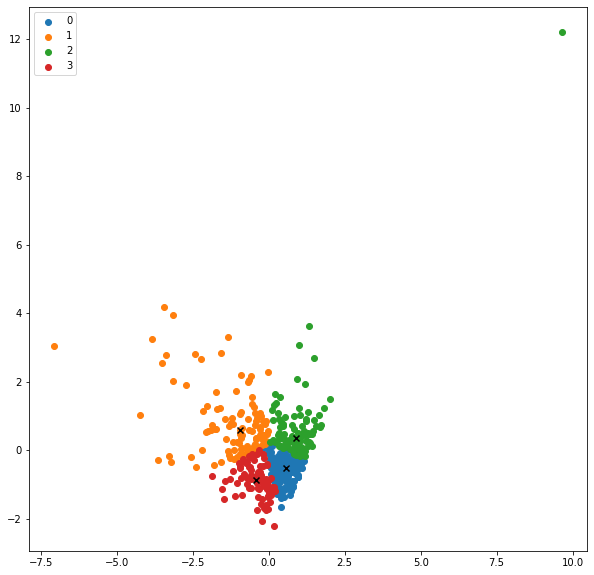

In [ ]:
cobj = KMedoids(n_clusters=4).fit(data)
label = cobj.labels_
centers = np.array(cobj.cluster_centers_)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
cobj.inertia_

308.4159592197549

## RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(df1)

In [ ]:
df3 = pd.DataFrame(scaled)
df3.columns = df1.columns
df3.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,-0.687654,0.411536,1.817046,1.696156
1,-0.637981,1.355693,1.499977,-0.352536
2,-0.624641,0.352476,0.492283,-0.448172
3,-0.888668,0.452875,0.000000,-0.795791
4,-0.509778,0.041683,0.000000,0.217207


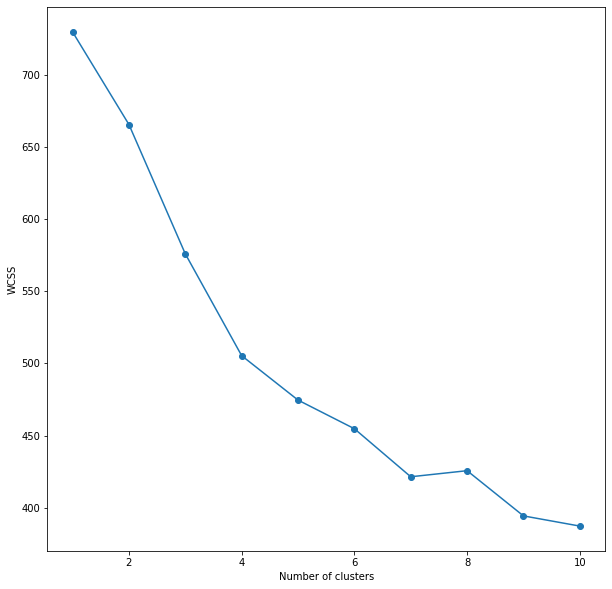

In [ ]:
elbow(df3)

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score
k_range=range(2,15)
best_n=-1
best_silhouette_score = -1
silhouette_score_arr = []
for k in k_range:
    kmedoids=KMedoids(n_clusters=k, random_state=200)
    kmedoids.fit(df3)
    clusters=kmedoids.predict(df3)
    score=silhouette_score(df3,clusters)
    print('k:',k,'score: ',score)
    silhouette_score_arr.append(score)

    if score> best_silhouette_score:
        best_n=k
        best_silhouette_score=score
        
print('best_n:',best_n,'best score:',best_silhouette_score)
silhouette_score_arr=np.array(silhouette_score_arr)

k: 2 score:  0.15148393321558393
k: 3 score:  0.09834826630657968
k: 4 score:  0.08562072891935565
k: 5 score:  0.07253888884459479
k: 6 score:  0.06233897269286763
k: 7 score:  0.046383549929272176
k: 8 score:  0.03981646972743785
k: 9 score:  0.0770392827184183
k: 10 score:  0.07931817411949589
k: 11 score:  0.06432069231071857
k: 12 score:  0.06334242127007791
k: 13 score:  0.09870373680182062
k: 14 score:  0.07833283258417978
best_n: 2 best score: 0.15148393321558393


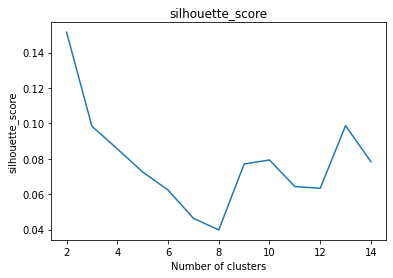

In [ ]:
plt.plot(k_range,silhouette_score_arr)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [ ]:
pca = PCA(2)
data = pca.fit_transform(df3)

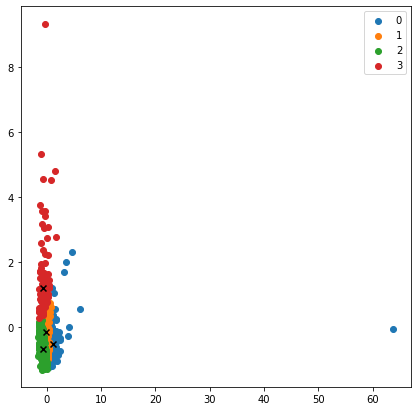

In [ ]:
cobj = KMedoids(n_clusters=4).fit(data)
label = cobj.labels_
centers = np.array(cobj.cluster_centers_)
plt.figure(figsize=(7,7))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
cobj.inertia_

353.54019495340856

## MaxAbsScaler

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaled = scaler.fit_transform(df1)

In [ ]:
df4 = pd.DataFrame(scaled)
df4.columns = df1.columns
df4.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.006976,0.599256,0.373984,0.238482
1,0.007737,0.737348,0.308725,0.049217
2,0.007941,0.590618,0.101322,0.040382
3,0.003897,0.605302,0.000000,0.008268
4,0.009701,0.545162,0.000000,0.101852


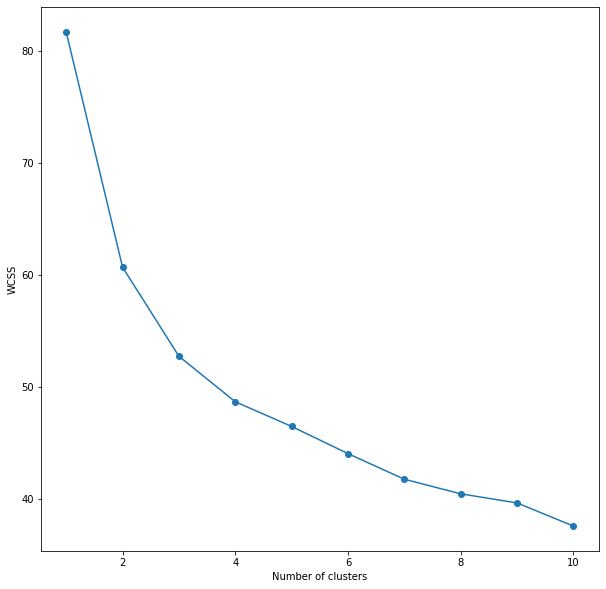

In [ ]:
elbow(df4)

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score
k_range=range(2,15)
best_n=-1
best_silhouette_score = -1
silhouette_score_arr = []
for k in k_range:
    kmedoids=KMedoids(n_clusters=k, random_state=200)
    kmedoids.fit(df4)
    clusters=kmedoids.predict(df4)
    score=silhouette_score(df4,clusters)
    print('k:',k,'score: ',score)
    silhouette_score_arr.append(score)

    if score> best_silhouette_score:
        best_n=k
        best_silhouette_score=score
        
print('best_n:',best_n,'best score:',best_silhouette_score)
silhouette_score_arr=np.array(silhouette_score_arr)

k: 2 score:  0.44153569427311085
k: 3 score:  0.292206226538952
k: 4 score:  0.2274616119560676
k: 5 score:  0.20343026315632362
k: 6 score:  0.27152884530571725
k: 7 score:  0.20915849860322547
k: 8 score:  0.20559625707240106
k: 9 score:  0.1832205177661662
k: 10 score:  0.14617317148730363
k: 11 score:  0.18757345929609026
k: 12 score:  0.15924198744975043
k: 13 score:  0.17449901935149742
k: 14 score:  0.16842120044091993
best_n: 2 best score: 0.44153569427311085


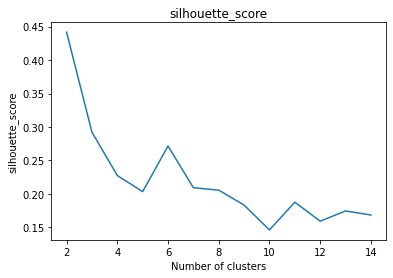

In [ ]:
plt.plot(k_range,silhouette_score_arr)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [ ]:
pca = PCA(2)
data = pca.fit_transform(df4)

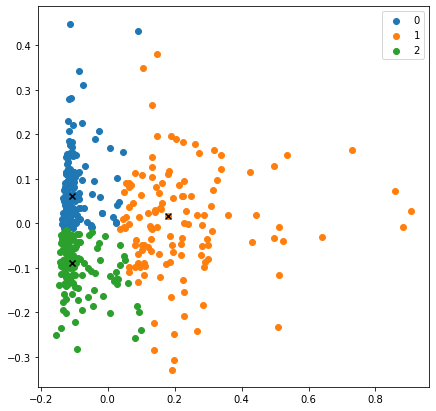

In [ ]:
cobj = KMedoids(n_clusters=3).fit(data)
label = cobj.labels_
centers = np.array(cobj.cluster_centers_)
plt.figure(figsize=(7,7))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
cobj.inertia_

40.28000137620457

In [ ]:
cluster = pd.Series(label)
df4['cluster'] = cluster
df4['cluster'].value_counts()

0    162
2    136
1    126
Name: cluster, dtype: int64

In [ ]:
import pandas as pd

df_lI = pd.DataFrame(columns = df4.columns[:-1])
df_lI

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율


In [ ]:
c1=[]
c2=[]
c3=[]
c4=[]

for i in range(3):    
    c1.append(df4[df4['cluster']==i]['기초생활수급자 인원_비율'].mean())
    c2.append(df4[df4['cluster']==i]['65세 이상 인구 수_비율'].mean())
    c3.append(df4[df4['cluster']==i]['우체국 수_비율'].mean())
    c4.append(df4[df4['cluster']==i]['ATM 수_비율'].mean())

df_lI['기초생활수급자 인원_비율']=c1
df_lI['65세 이상 인구 수_비율']=c2
df_lI['우체국 수_비율']=c3
df_lI['ATM 수_비율']=c4

In [ ]:
df_lI

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.030311,0.613132,0.013863,0.073183
1,0.021842,0.557616,0.329987,0.150646
2,0.013080,0.442314,0.028106,0.104761


In [ ]:
data = pd.read_excel('산일구비_최종_데이터셋.xlsx')

df1['자치구/동'] = data['자치구/동']
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율,자치구/동
0,0.013375,0.184655,1.626016,13.008130,종로구 사직동
1,0.014834,0.227207,1.342282,2.684564,종로구 삼청동
2,0.015225,0.181994,0.440529,2.202643,종로구 부암동
3,0.007472,0.186518,0.000000,0.450958,종로구 평창동
4,0.018599,0.167987,0.000000,5.555556,종로구 무악동


In [ ]:
dong0 = []
dong1 = []
dong2 = []

data = pd.read_excel('산일구비_최종_데이터셋.xlsx')
for i in range(len(df1)):
    if df4.iloc[i]['cluster']==0:
        dong0.append(df1.iloc[i]['자치구/동'])
    elif df4.iloc[i]['cluster']==1:
        dong1.append(df1.iloc[i]['자치구/동'])
    else:
        dong2.append(df1.iloc[i]['자치구/동'])

In [ ]:
dong0

['종로구 부암동',
 '종로구 평창동',
 '종로구 무악동',
 '종로구 가회동',
 '종로구 창신1동',
 '종로구 창신2동',
 '종로구 창신3동',
 '종로구 숭인2동',
 '종로구 청운효자동',
 '중구 필동',
 '중구 신당5동',
 '중구 중림동',
 '중구 다산동',
 '중구 청구동',
 '중구 동화동',
 '용산구 용산2가동',
 '용산구 남영동',
 '용산구 용문동',
 '용산구 이촌1동',
 '용산구 이촌2동',
 '용산구 이태원1동',
 '용산구 한남동',
 '성동구 응봉동',
 '성동구 금호1가동',
 '성동구 금호4가동',
 '성동구 성수2가1동',
 '성동구 송정동',
 '성동구 용답동',
 '광진구 중곡1동',
 '광진구 중곡3동',
 '광진구 중곡4동',
 '광진구 구의2동',
 '광진구 자양4동',
 '동대문구 청량리동',
 '동대문구 제기동',
 '동대문구 전농2동',
 '동대문구 답십리2동',
 '동대문구 이문2동',
 '중랑구 면목2동',
 '중랑구 면목4동',
 '중랑구 면목7동',
 '중랑구 중화2동',
 '중랑구 묵1동',
 '중랑구 망우3동',
 '중랑구 신내1동',
 '중랑구 면목본동',
 '중랑구 면목3.8동',
 '중랑구 망우본동',
 '성북구 돈암1동',
 '성북구 정릉1동',
 '성북구 정릉3동',
 '성북구 정릉4동',
 '성북구 장위1동',
 '성북구 성북동',
 '성북구 석관동',
 '강북구 번1동',
 '강북구 수유1동',
 '강북구 미아동',
 '강북구 우이동',
 '강북구 인수동',
 '도봉구 쌍문1동',
 '도봉구 방학2동',
 '도봉구 방학3동',
 '도봉구 창1동',
 '도봉구 창2동',
 '도봉구 창3동',
 '도봉구 도봉1동',
 '노원구 월계1동',
 '노원구 월계2동',
 '노원구 하계1동',
 '노원구 중계4동',
 '노원구 상계1동',
 '노원구 상계5동',
 '노원구 상계9동',
 '노원구 상계3.4동',
 '은평구 녹번동',
 '은평구 불광1동',
 '은평구 갈현1동',
 '은

In [ ]:
dong1

['종로구 사직동',
 '종로구 삼청동',
 '종로구 종로1.2.3.4가동',
 '종로구 종로5.6가동',
 '종로구 이화동',
 '종로구 숭인1동',
 '종로구 혜화동',
 '중구 소공동',
 '중구 회현동',
 '중구 명동',
 '중구 장충동',
 '중구 을지로동',
 '중구 신당동',
 '중구 약수동',
 '용산구 후암동',
 '용산구 원효로2동',
 '용산구 이태원2동',
 '용산구 보광동',
 '용산구 청파동',
 '용산구 원효로1동',
 '용산구 한강로동',
 '성동구 마장동',
 '성동구 사근동',
 '성동구 행당1동',
 '성동구 성수2가3동',
 '성동구 왕십리도선동',
 '성동구 금호2.3가동',
 '광진구 중곡2동',
 '광진구 구의1동',
 '광진구 구의3동',
 '광진구 자양2동',
 '동대문구 용신동',
 '동대문구 전농1동',
 '동대문구 장안1동',
 '동대문구 이문1동',
 '중랑구 면목5동',
 '중랑구 상봉1동',
 '중랑구 중화1동',
 '중랑구 묵2동',
 '중랑구 신내2동',
 '성북구 정릉2동',
 '성북구 월곡1동',
 '성북구 월곡2동',
 '성북구 장위2동',
 '성북구 삼선동',
 '성북구 종암동',
 '강북구 번2동',
 '강북구 번3동',
 '강북구 수유2동',
 '강북구 수유3동',
 '강북구 삼양동',
 '강북구 송중동',
 '강북구 송천동',
 '도봉구 쌍문2동',
 '도봉구 쌍문3동',
 '도봉구 방학1동',
 '도봉구 창5동',
 '도봉구 도봉2동',
 '노원구 월계3동',
 '노원구 상계10동',
 '노원구 상계6.7동',
 '노원구 중계2.3동',
 '노원구 공릉1동',
 '은평구 갈현2동',
 '은평구 대조동',
 '은평구 응암1동',
 '은평구 수색동',
 '은평구 응암3동',
 '서대문구 홍제1동',
 '서대문구 북가좌2동',
 '서대문구 충현동',
 '서대문구 신촌동',
 '마포구 성산1동',
 '마포구 도화동',
 '마포구 공덕동',
 '마포구 아현동',
 '양천구 목3동',
 '양천구 

In [ ]:
dong2

['종로구 교남동',
 '중구 광희동',
 '중구 황학동',
 '용산구 효창동',
 '용산구 서빙고동',
 '성동구 왕십리2동',
 '성동구 행당2동',
 '성동구 성수1가1동',
 '성동구 성수1가2동',
 '성동구 옥수동',
 '광진구 화양동',
 '광진구 군자동',
 '광진구 능동',
 '광진구 광장동',
 '광진구 자양1동',
 '광진구 자양3동',
 '동대문구 회기동',
 '동대문구 휘경1동',
 '동대문구 휘경2동',
 '동대문구 장안2동',
 '동대문구 답십리1동',
 '중랑구 상봉2동',
 '성북구 돈암2동',
 '성북구 안암동',
 '성북구 보문동',
 '성북구 길음1동',
 '성북구 길음2동',
 '성북구 장위3동',
 '성북구 동선동',
 '강북구 삼각산동',
 '도봉구 쌍문4동',
 '도봉구 창4동',
 '노원구 공릉2동',
 '노원구 하계2동',
 '노원구 중계본동',
 '노원구 중계1동',
 '노원구 상계2동',
 '노원구 상계8동',
 '은평구 응암2동',
 '은평구 진관동',
 '서대문구 남가좌1동',
 '서대문구 남가좌2동',
 '서대문구 북아현동',
 '마포구 용강동',
 '마포구 대흥동',
 '마포구 염리동',
 '마포구 신수동',
 '마포구 서교동',
 '마포구 합정동',
 '마포구 연남동',
 '마포구 성산2동',
 '마포구 상암동',
 '마포구 서강동',
 '양천구 목1동',
 '양천구 목2동',
 '양천구 목4동',
 '양천구 신월5동',
 '양천구 신월6동',
 '양천구 신정2동',
 '양천구 신정3동',
 '양천구 신정6동',
 '양천구 목5동',
 '강서구 염창동',
 '강서구 등촌1동',
 '강서구 등촌2동',
 '강서구 화곡6동',
 '강서구 가양1동',
 '강서구 발산1동',
 '강서구 공항동',
 '강서구 방화1동',
 '강서구 화곡1동',
 '강서구 우장산동',
 '구로구 신도림동',
 '구로구 구로5동',
 '금천구 독산1동',
 '영등포구 당산2동',
 '영등포구 양평1동',
 '영등포구 양평2동',
